#### Design Matrix 

In [1]:
import numpy as np
import pandas as pd
import glob
import os
from nilearn import plotting
from nilearn.image import load_img
from nilearn.plotting import plot_design_matrix, plot_stat_map

os.chdir('/Users/jennifer/Single-Subject-Working-Memory-Analysis/')
pattern = os.path.join('func', 'run01', '*.nii')

nii_files = glob.glob(pattern)

tr = 2.0  # repetition time is 2000 ms
n_scans = load_img(nii_files).shape[-1] #number of scans per acquisition
frame_times = np.arange(n_scans) * tr  # here are the corresponding frame times

In [2]:
tsv_file = pd.read_csv('func/run01/events.tsv', sep='\t')
tsv_file.head(10)

,onset,duration,block,counterbalance,ChosenProbeColor,CorrectProbeColor,CurrentTask,LastITI,ProbeLoc,ProbeMatch,...,probeACC,probeStart,probert,response,runStart,scannerStart,stimFlip,stimStart,subject,trialStart
0,6.0,3.5,1,1,5,141,1,6.0,7,1,...,1,1634146.0,0.774408,1,1634145.0,1634139.0,1634145.0,1634145.0,103,1634145.0
1,10.5,3.5,1,1,2,121,1,6.0,5,1,...,1,1634151.0,0.880411,1,1634145.0,1634139.0,1634149.0,1634149.0,103,1634149.0
2,15.0,3.5,1,1,9,21,1,6.0,5,2,...,1,1634155.0,0.959108,2,1634145.0,1634139.0,1634154.0,1634154.0,103,1634153.0
3,19.5,3.5,1,1,1,21,1,6.0,2,1,...,1,1634160.0,0.863326,1,1634145.0,1634139.0,1634158.0,1634158.0,103,1634157.0
4,24.0,3.5,1,1,5,41,1,6.0,5,1,...,1,1634164.0,1.645432,1,1634145.0,1634139.0,1634163.0,1634163.0,103,1634162.0
5,28.5,3.5,1,1,2,1,1,6.0,9,2,...,1,1634169.0,0.796284,2,1634145.0,1634139.0,1634167.0,1634167.0,103,1634166.0
6,33.5,3.5,1,1,3,141,1,6.0,6,2,...,1,1634174.0,0.831825,2,1634145.0,1634139.0,1634172.0,1634172.0,103,1634171.0
7,38.5,3.5,1,1,1,81,1,6.0,9,1,...,1,1634179.0,0.615353,1,1634145.0,1634139.0,1634177.0,1634177.0,103,1634176.0
8,44.5,3.5,1,1,1,61,1,6.0,3,1,...,1,1634185.0,1.565718,1,1634145.0,1634139.0,1634183.0,1634183.0,103,1634181.0
9,50.0,3.5,1,1,3,21,1,6.0,5,1,...,1,1634190.0,0.630607,1,1634145.0,1634139.0,1634189.0,1634189.0,103,1634187.0


In [3]:
events = tsv_file[['onset', 'duration']]
events.head(10)

,onset,duration
0,6.0,3.5
1,10.5,3.5
2,15.0,3.5
3,19.5,3.5
4,24.0,3.5
5,28.5,3.5
6,33.5,3.5
7,38.5,3.5
8,44.5,3.5
9,50.0,3.5


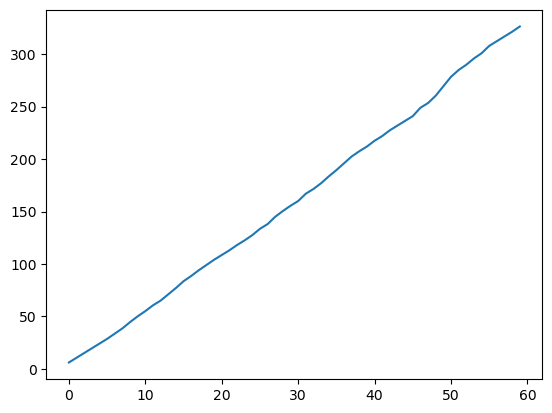

In [4]:
import matplotlib.pyplot as plt
plt.plot(events['onset'])
plt.show()

In [5]:
from nilearn.glm.first_level import make_first_level_design_matrix

hrf_model = "glover"
X1 = make_first_level_design_matrix(
    frame_times,
    events,
    hrf_model=hrf_model,
)

/Users/jennifer/anaconda3/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:129: UserWarning: 'trial_type' column not found in the given events data.
  warnings.warn(


<Axes: label='conditions', ylabel='scan number'>

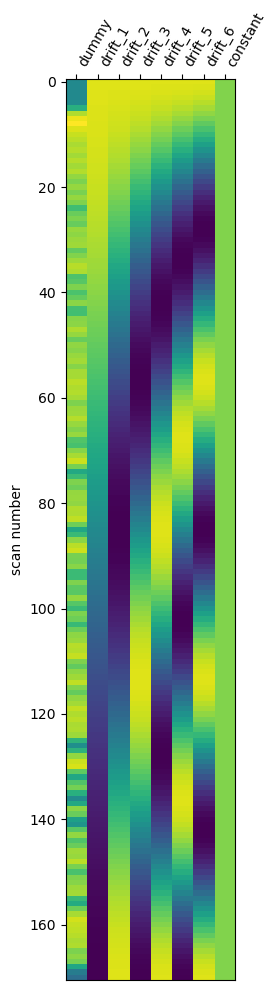

In [6]:
import matplotlib.pyplot as plt
plot_design_matrix(X1)


### Attemtping to plot average of brain activation

In [7]:
# Sample at the beginning of each acquisition.
slice_time_ref = 0.0
# We use a discrete cosine transform to model signal drifts.
drift_model = "Cosine"
# The cutoff for the drift model is 0.01 Hz.
high_pass = 0.01
# The hemodynamic response function
hrf_model = "spm + derivative"

In [8]:
pattern = os.path.join('func', 'run*', '*.nii')
nii_files = glob.glob(pattern)

In [9]:
import warnings

from nilearn.image import concat_imgs, mean_img, resample_img

# Avoid getting too many warnings due to resampling
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fmri_img = [
        concat_imgs(each_file, auto_resample=True) for each_file in nii_files
    ]
affine, shape = fmri_img[0].affine, fmri_img[0].shape
print("Resampling the second image (this takes time)...")
fmri_img[1] = resample_img(fmri_img[1], affine, shape[:3])

Resampling the second image (this takes time)...


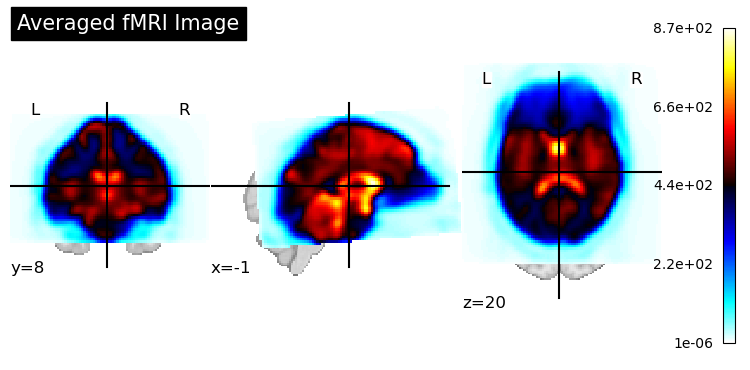

In [10]:
mean_image = mean_img(fmri_img)
plot_stat_map(mean_image, title="Averaged fMRI Image")

In [11]:
from nilearn import image

image.load_img('func/run01/*.nii').shape # 4D image!

(86, 86, 54, 171)

### Notes from 10/30


Average over time points, average over fmri image, plot the anatomical image for the background 


image.load_img('func/run01/*.nii') is the full 4D image! 

How to get the voxels we want PFC?? find the specific voxel --> Look at GLM, and see where it lights up, know which voxels